### The ratings in Movielens and in TMDB are Consistent？

this question includes two sub questions:

1. The average ratings of each movie in Movielens and in TMDB are consistent?


2. The number of ratings of each movie in Movielens and in TMDB are consistent?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
movie_data=pd.read_csv('movies.csv')

### 1. The average ratings of each movie in Movielens and in TMDB are consistent?

Because in TMDB, the total score is 10 but in Movielens, the total score is 5. Thus, the sccore in Movielens should be doubled.

In [3]:
movie_data['ave_Movielen_score_modified']=movie_data['ave_Movielen_score']*2

In [4]:
movie_data['counts_frac_movielens']=movie_data['sum_Movielen_rating']/movie_data['sum_Movielen_rating'].sum()
movie_data['counts_frac_TMDB']=movie_data['sum_TMDB_rating']/movie_data['sum_TMDB_rating'].sum()

In [5]:
movie_data[['ave_Movielen_score_modified', 'ave_TMDB_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
ave_Movielen_score_modified,58300.0,6.134775,1.477164,1.0,5.363636,6.285714,7.0,10.0
ave_TMDB_score,58300.0,6.001455,1.396218,0.0,5.500000,6.200000,6.9,10.0


array([[<AxesSubplot:title={'center':'ave_Movielen_score_modified'}>,
        <AxesSubplot:title={'center':'ave_TMDB_score'}>]], dtype=object)

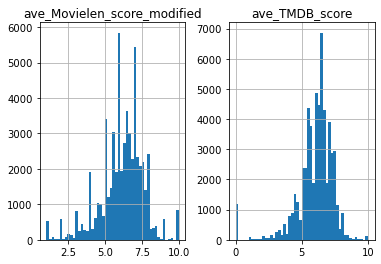

In [6]:
movie_data[['ave_Movielen_score_modified', 'ave_TMDB_score']].hist(bins=50)

In [7]:
movie_data['diff_scores']=movie_data['ave_Movielen_score_modified']-movie_data['ave_TMDB_score']

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff_scores', ylabel='Density'>

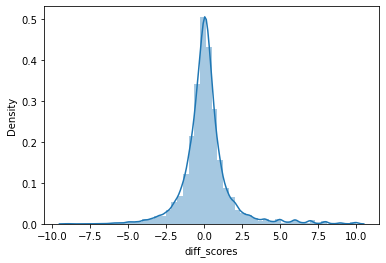

In [8]:
sns.distplot(movie_data['diff_scores'])

let's do a null Hypothesis: 

- H0: There is no difference between the ratings given to movies from movielens and TMDB
- H1: There is difference between the ratings given to movies from movielens and TMDB

In [9]:
stats.ttest_rel(movie_data['ave_Movielen_score_modified'],
                      movie_data['ave_TMDB_score'], axis=0, nan_policy='omit', alternative='two-sided')

Ttest_relResult(statistic=20.001241505852125, pvalue=1.0673377253889067e-88)

- Because pvalue<0.05, we refuse the null hypothesisthe, which means there is a difference between the ratings given to movies by movielens and TMDB.

### 2. The number of ratings of each movie in Movielens and in TMDB are consistent?


The total number of ratings in each movie by movielens and TMDB are different. Thus, as shown in the picture below, there is not very good linear relationship between number of ratings in each movie by movielens and TMDB.

<AxesSubplot:xlabel='sum_Movielen_rating', ylabel='sum_TMDB_rating'>

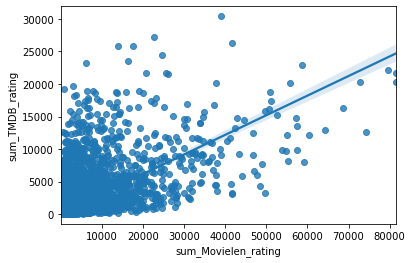

In [10]:
sns.regplot(x='sum_Movielen_rating',y='sum_TMDB_rating',data=movie_data)

Thus, we convert the **number of ratings of each movie** in movielens and TMDB to the **ratio of number of ratings of each movie in total ratings** in movielens and TMDB respectively.

In [11]:
movie_data[['counts_frac_movielens','counts_frac_TMDB']].describe().T

,count,mean,std,min,25%,50%,75%,max
counts_frac_movielens,58300.0,0.000017,0.000100,4.007646e-08,8.015293e-08,2.404588e-07,0.000001,0.003266
counts_frac_TMDB,58300.0,0.000017,0.000076,0.000000e+00,5.268509e-07,1.448840e-06,0.000005,0.002003


array([[<AxesSubplot:title={'center':'counts_frac_movielens'}>,
        <AxesSubplot:title={'center':'counts_frac_TMDB'}>]], dtype=object)

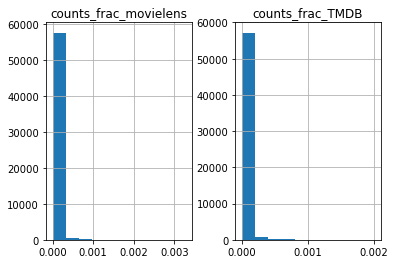

In [12]:
movie_data[['counts_frac_movielens','counts_frac_TMDB']].hist()

let's do a null Hypothesis: 

- H0: There is no difference between the ratio of number of ratings in total number given to movies from movielens and TMDB
- H1: There is difference between the ratio of number of ratings in total number given to movies from movielens and TMDB

In [13]:
stats.ttest_rel(movie_data['counts_frac_movielens'],
                      movie_data['counts_frac_TMDB'], axis=0, nan_policy='omit', alternative='two-sided')

Ttest_relResult(statistic=-9.423453702813514e-16, pvalue=0.9999999999999992)

because the pvalue is larger than 0.05, we can not refuse the null hypothesis H0 that There is no difference between the ratio of number of ratings in total number given to movies from movielens and TMDB